In [26]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("data.csv")

# Display the data
print(data)

    Patient ID  Blood Pressure Before  Blood Pressure After
0            1                    130                   120
1            2                    142                   135
2            3                    120                   118
3            4                    135                   127
4            5                    148                   140
..         ...                    ...                   ...
95          96                    136                   129
96          97                    143                   137
97          98                    127                   123
98          99                    139                   135
99         100                    135                   130

[100 rows x 3 columns]


In [28]:

# Measure the dispersion in both columns
blood_pressure_before = data['Blood Pressure Before']
blood_pressure_after = data['Blood Pressure After']

# Calculate the standard deviation for both columns
std_dev_before = blood_pressure_before.std()
std_dev_after = blood_pressure_after.std()

# Calculate the range for both columns
range_before = blood_pressure_before.max() - blood_pressure_before.min()
range_after = blood_pressure_after.max() - blood_pressure_after.min()

# Interpret the results
print("Dispersion (Blood Pressure Before):")
print("Standard Deviation:", round(std_dev_before, 2))
print("Range:", range_before)
print()

print("Dispersion (Blood Pressure After):")
print("Standard Deviation:", round(std_dev_after, 2))
print("Range:", range_after)


Dispersion (Blood Pressure Before):
Standard Deviation: 6.6
Range: 28

Dispersion (Blood Pressure After):
Standard Deviation: 6.89
Range: 23


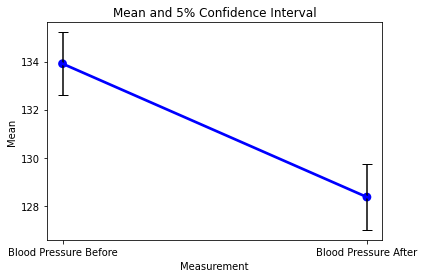

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Calculate the mean for both columns
mean_before = data['Blood Pressure Before'].mean()
mean_after = data['Blood Pressure After'].mean()

# Calculate the 5% confidence interval for both columns
conf_interval_before = stats.t.interval(0.95, len(data['Blood Pressure Before'])-1, loc=mean_before, scale=stats.sem(data['Blood Pressure Before']))
conf_interval_after = stats.t.interval(0.95, len(data['Blood Pressure After'])-1, loc=mean_after, scale=stats.sem(data['Blood Pressure After']))

# Plotting the mean and confidence intervals
fig, ax = plt.subplots()
sns.pointplot(x=['Blood Pressure Before', 'Blood Pressure After'], y=[mean_before, mean_after], ax=ax, color='blue', markers='o')
ax.errorbar(x=['Blood Pressure Before', 'Blood Pressure After'], y=[mean_before, mean_after], yerr=[mean_before - conf_interval_before[0], mean_after - conf_interval_after[0]], fmt='none', ecolor='black', capsize=5)

# Adding labels and title to the plot
ax.set_xlabel('Measurement')
ax.set_ylabel('Mean')
ax.set_title('Mean and 5% Confidence Interval')

# Display the plot
plt.show()


In [31]:
# Calculate the Mean Absolute Deviation (MAD) for both columns
mad_before = np.mean(np.abs(data['Blood Pressure Before'] - data['Blood Pressure Before'].mean()))
mad_after = np.mean(np.abs(data['Blood Pressure After'] - data['Blood Pressure After'].mean()))

# Calculate the Standard Deviation (SD) for both columns
sd_before = data['Blood Pressure Before'].std()
sd_after = data['Blood Pressure After'].std()

# Print the results
print("Mean Absolute Deviation (MAD):")
print("Blood Pressure Before:", mad_before)
print("Blood Pressure After:", mad_after)
print()
print("Standard Deviation (SD):")
print("Blood Pressure Before:", sd_before)
print("Blood Pressure After:", sd_after)


Mean Absolute Deviation (MAD):
Blood Pressure Before: 5.7118
Blood Pressure After: 5.9

Standard Deviation (SD):
Blood Pressure Before: 6.598278012275075
Blood Pressure After: 6.8880221025232276


Interpretation of the results:

The MAD for 'Blood Pressure Before' represents the average absolute deviation of each data point from the mean of that column. A higher MAD value indicates a higher average variability or dispersion in the 'Blood Pressure Before' measurements.

The MAD for 'Blood Pressure After' represents the average absolute deviation of each data point from the mean of that column. A higher MAD value indicates a higher average variability or dispersion in the 'Blood Pressure After' measurements.

The SD for 'Blood Pressure Before' represents the standard deviation of the 'Blood Pressure Before' measurements. It provides a measure of the spread or dispersion of the data points around the mean. A higher SD value indicates a higher degree of variability in the 'Blood Pressure Before' measurements.

The SD for 'Blood Pressure After' represents the standard deviation of the 'Blood Pressure After' measurements. It provides a measure of the spread or dispersion of the data points around the mean. A higher SD value indicates a higher degree of variability in the 'Blood Pressure After' measurements.

In [34]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
corr_coef, p_value = pearsonr(data['Blood Pressure Before'], data['Blood Pressure After'])

# Print the results
print("Correlation Coefficient:", corr_coef)
print("p-value:", p_value)

# Check the significance at the 1% level
alpha = 0.01
if p_value < alpha:
    print("The correlation coefficient is statistically significant at the 1% level.")
else:
    print("The correlation coefficient is not statistically significant at the 1% level.")


Correlation Coefficient: 0.9779485966556021
p-value: 1.8097381433059708e-68
The correlation coefficient is statistically significant at the 1% level.
